<h2>LOADING DATA, EDA, BRAINSTORMING</h2>

In [1]:
# install necessary packages for imports 
%pip install scikit-image
%pip install scikit-learn
%pip install matplotlib
%pip install cartopy
%pip install folium
%pip install mapbox_vector_tile
%pip install lxml
%pip install pandas
%pip install owslib
%pip install geopandas
%pip install rasterio
%pip install fiona
%pip install ipyleaflet
%pip install cairosvg # If needed, more specific install instructions for cairosvg: https://cairosvg.org/documentation/ 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 26.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 25.7 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.30.2
    Uninstalling protobuf-6.30.2:
      Successfully uninstalled protobuf-6.30.2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  

In [2]:
import os
from io import BytesIO
from skimage import io
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import folium
import urllib.request
import urllib.parse
import mapbox_vector_tile
import xml.etree.ElementTree as xmlet
import lxml.etree as xmltree
from PIL import Image as plimg
from PIL import ImageDraw
import numpy as np
import pandas as pd
from owslib.wms import WebMapService
from IPython.display import Image, display
import geopandas as gpd
from shapely.geometry import box
import urllib.request
import rasterio
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import fiona
from datetime import datetime, timedelta
%matplotlib inline

In [7]:
# Connect to GIBS WMS Service
wms = WebMapService('https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?', version='1.1.1')

# Configure request for MODIS_Terra_CorrectedReflectance_TrueColor
img = wms.getmap(layers=['MODIS_Terra_CorrectedReflectance_TrueColor'],  # Layers
                 srs='epsg:4326',  # Map projection
                 bbox=(-180,-90,180,90),  # Bounds
                 size=(1200, 600),  # Image size
                 time='2021-09-21',  # Time of data
                 format='image/png',  # Image format
                 transparent=True)  # Nodata transparency



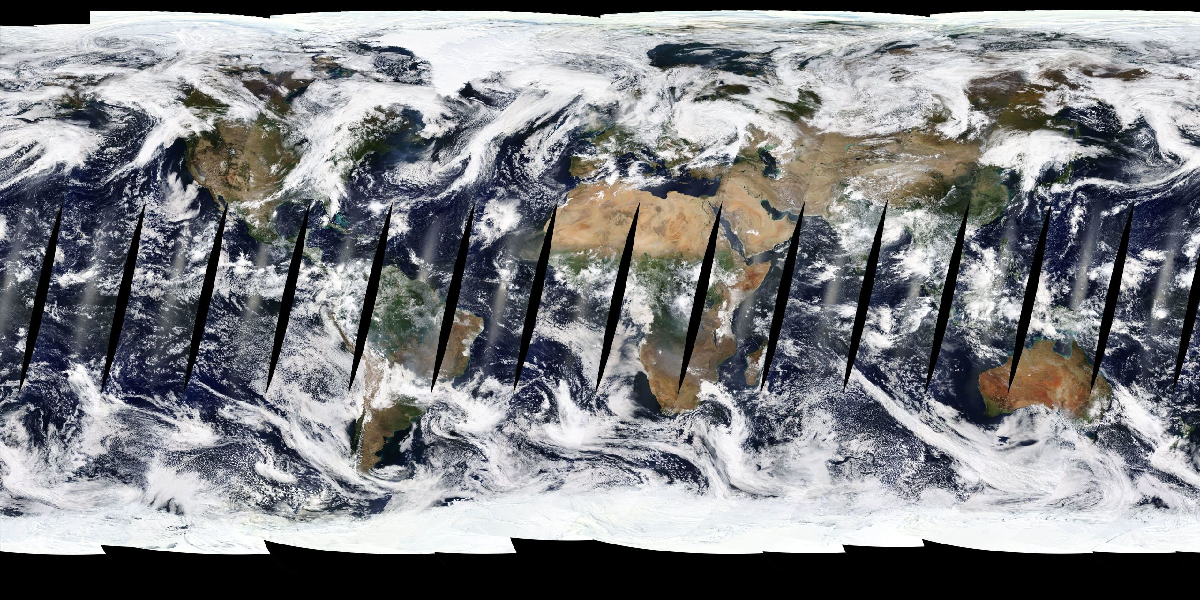

In [8]:
# Save output PNG to a file
out = open('MODIS_Terra_CorrectedReflectance_TrueColor.png', 'wb')
out.write(img.read())
out.close()

# View image
Image('MODIS_Terra_CorrectedReflectance_TrueColor.png')

In [9]:
# Construct capability URL.
wmsUrl = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?\
SERVICE=WMS&REQUEST=GetCapabilities'

# Request WMS capabilities.
response = requests.get(wmsUrl)

# Display capabilities XML in original format. Tag and content in one line.
WmsXml = xmltree.fromstring(response.content)
# print(xmltree.tostring(WmsXml, pretty_print = True, encoding = str))

In [ ]:
# Currently total layers are 1081.

# Coverts response to XML tree.
WmsTree = xmlet.fromstring(response.content)

alllayer = []
layerNumber = 0

# Parse XML.
for child in WmsTree.iter():
    for layer in child.findall("./{http://www.opengis.net/wms}Capability/{http://www.opengis.net/wms}Layer//*/"): 
         if layer.tag == '{http://www.opengis.net/wms}Layer': 
            f = layer.find("{http://www.opengis.net/wms}Name")
            if f is not None:
                alllayer.append(f.text)
                
                layerNumber += 1

print('There are layers: ' + str(layerNumber))

for one in sorted(alllayer)[:5]:
    print(one)
print('...')
for one in sorted(alllayer)[-5:]:
    print(one)

In [ ]:
df = pd.read_csv('SUOMI_VIIRS_C2_USA_contiguous_and_Hawaii_7d.csv')
df.head(10)

13100

In [18]:
len(df)

13100

In [19]:
df['satellite'].value_counts()

satellite
N    13100
Name: count, dtype: int64